# GRIP_TASK_3
### Author: Venkatesh Hegde

#### What is a Profit Model?
A profit model refers to a company’s plan that aims to make the business profitable and viable. It lays out what the company plans to manufacture or provide, how sales will be generated, and all the expenses that the business will incur in a bid to make the model viable. Without a concrete profit model, the business will be operating blindly and will be much less likely to become profitable.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
print("Data imported successfully")
df

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 2697 to 4101
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   9994 non-null   int64  
 1   Sales         9994 non-null   float64
 2   Quantity      9994 non-null   int64  
 3   Discount      9994 non-null   float64
 4   Profit        9994 non-null   float64
 5   Ship Mode     9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Category      9994 non-null   object 
 12  Sub-Category  9994 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


In [175]:
# To check whether it contains null value or not
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:>

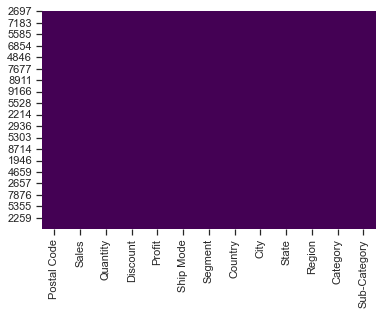

In [209]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


In [210]:
numerical = ['Postal Code','Sales','Quantity','Discount','Profit']
categorical = ['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']
df = df[numerical+categorical]


# Analyzing Numerical Variable

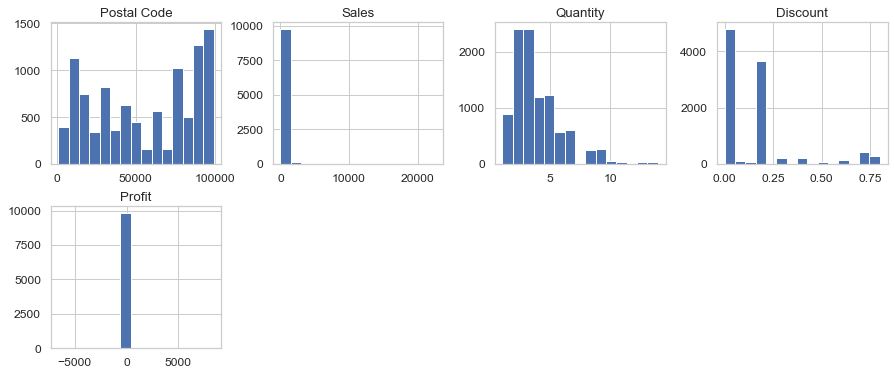

In [213]:
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

# Analyzing Categorical data

C:\Users\venka\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


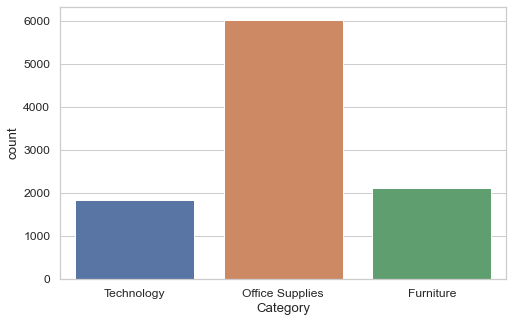

In [214]:
sns.countplot(df['Category']);

C:\Users\venka\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\miniconda3\li

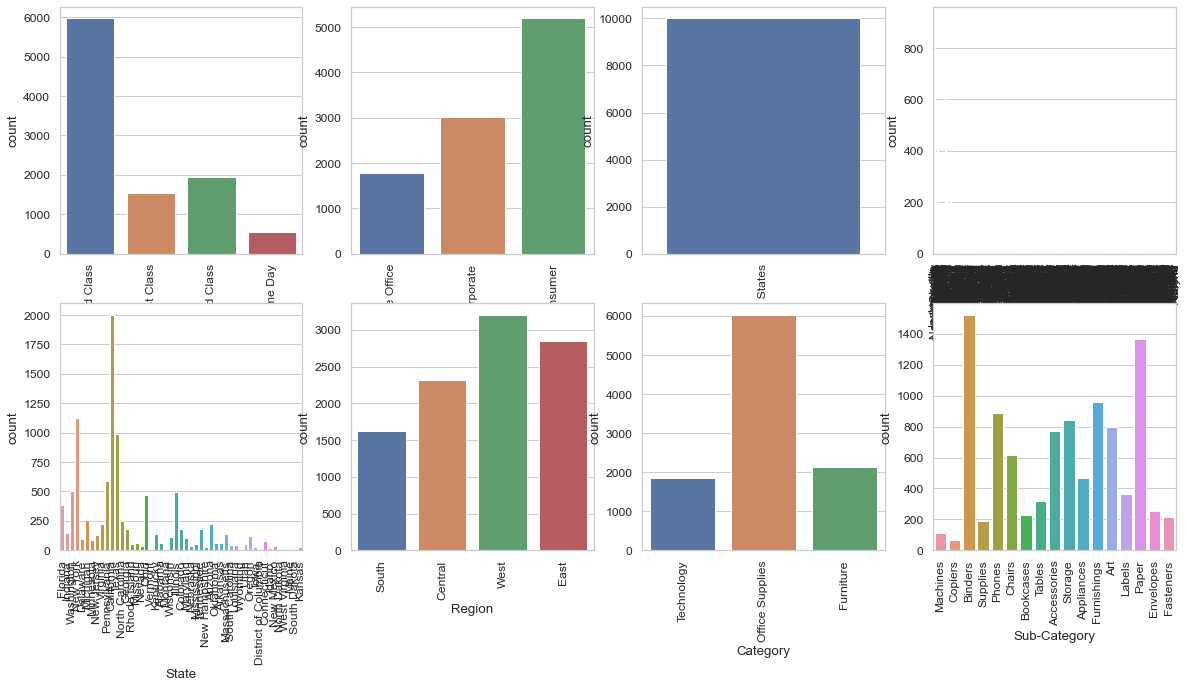

In [215]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Analyzing the relationship between Numerical data

#### Sales vs Profit

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

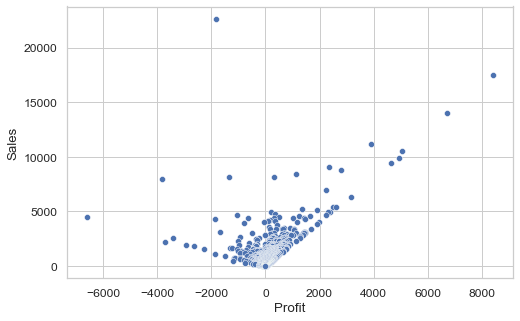

In [220]:
# Profit vs Sales
sns.scatterplot(x=df['Profit'], y=df['Sales'])

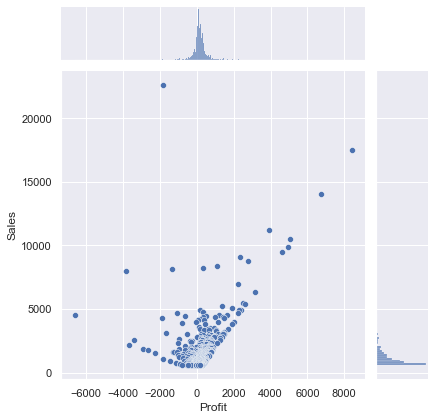

In [226]:
# jointplot which gives two distplots
sns.jointplot(x=df['Profit'].head(1000),y=df["Sales"].head(1000),data=df)

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

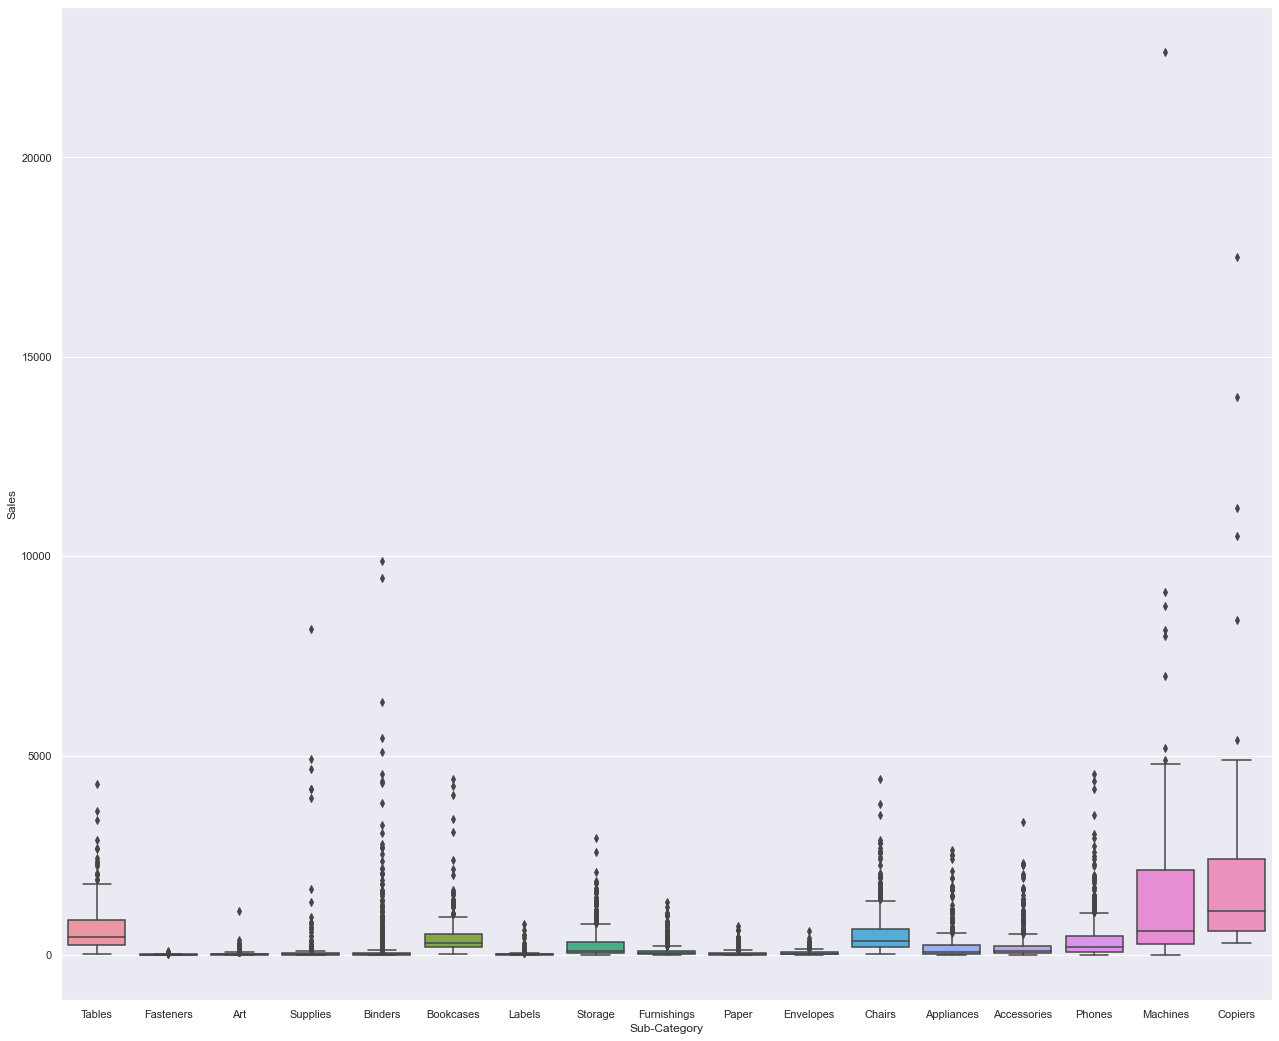

In [225]:

sns.set(rc={'figure.figsize':(21.7,18.27)})
sorted_nb = df.groupby(['Sub-Category'])['Profit'].median().sort_values()
sns.boxplot(x=df['Sub-Category'], y=df['Sales'], order=list(sorted_nb.index))

C:\Users\venka\AppData\Local\Temp/ipykernel_18808/2314426090.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


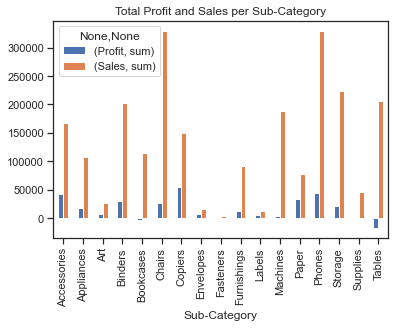

In [182]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

C:\Users\venka\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


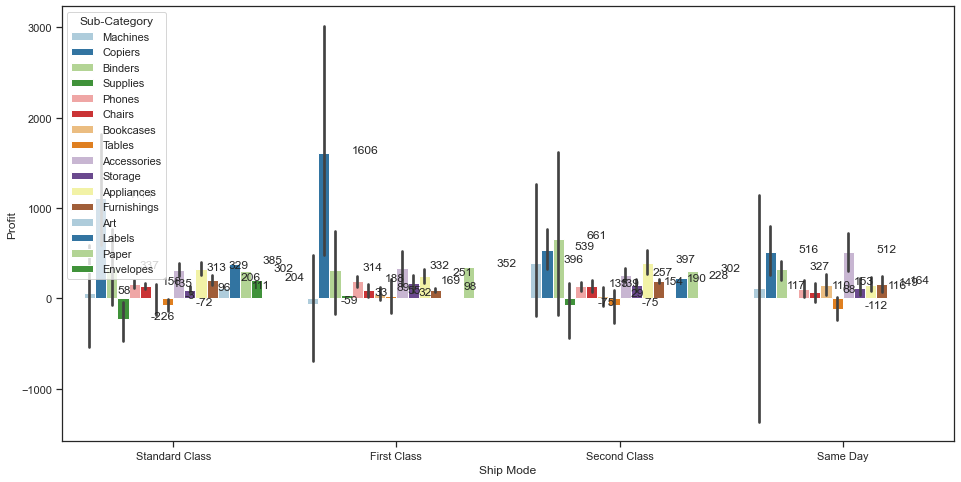

In [194]:
#Calculating Profit gained in each Category based on Ship Mode
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot(df['Ship Mode'].head(1000),df['Profit'].head(1000),hue=df['Sub-Category'].head(1000),palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

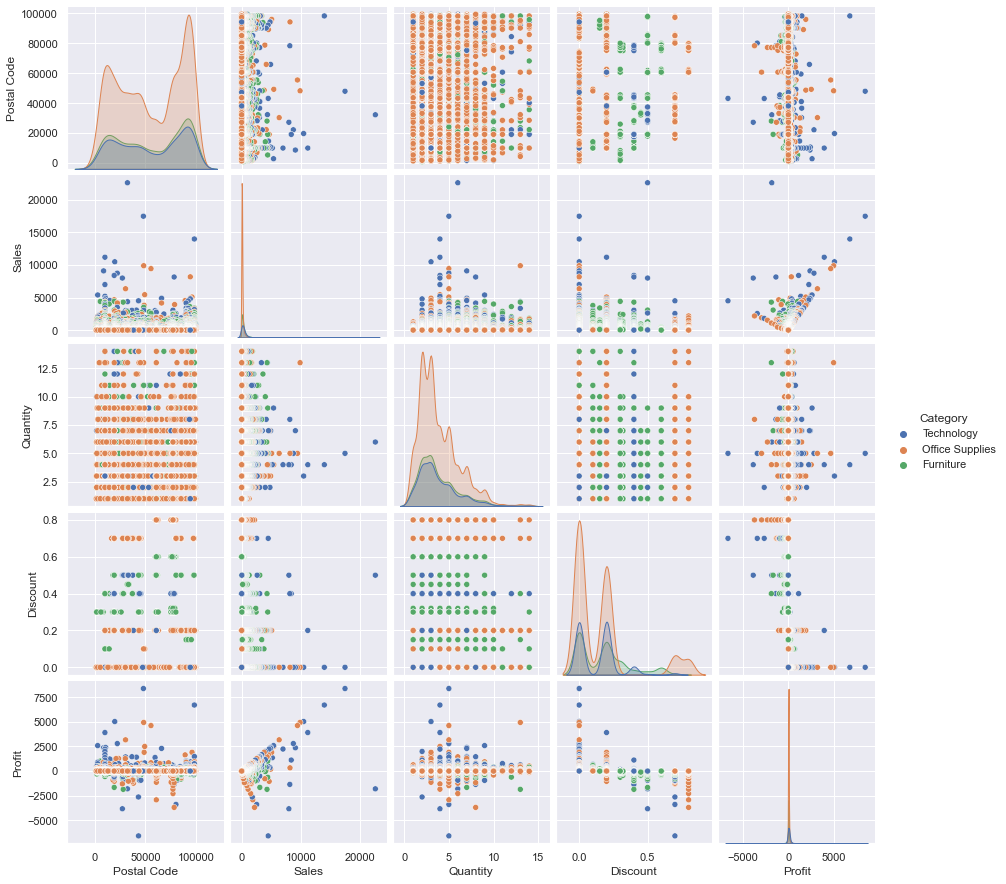

In [147]:
sns.pairplot(df,hue='Category')

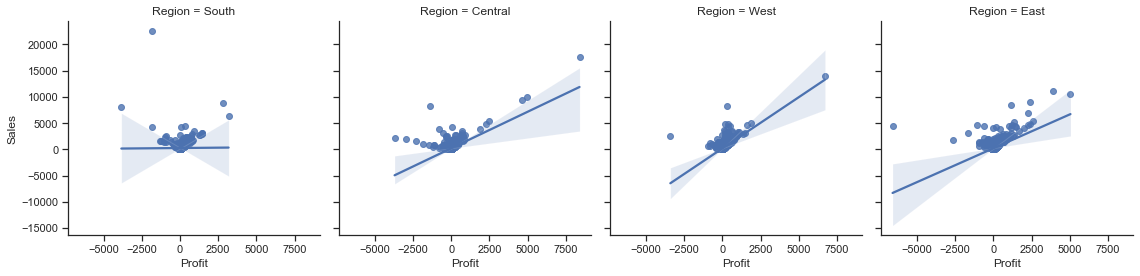

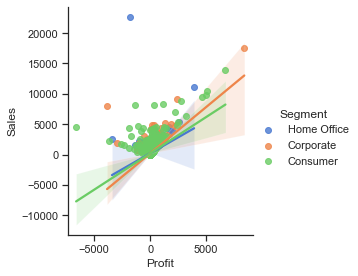

In [174]:
sns.set_theme(style="ticks")
# Show the results of a linear regression within each dataset
sns.lmplot(x="Profit", y="Sales",data=df,palette="muted", height=4,col='Region'
           )
sns.lmplot(x="Profit", y="Sales",data=df,palette="muted", height=4,hue='Segment'
           )

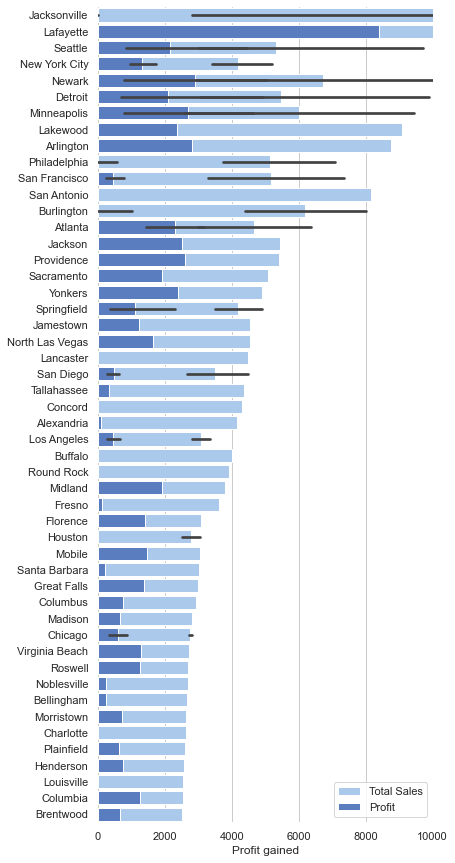

In [56]:
sns.set_theme(style='whitegrid')
f,ax = plt.subplots(figsize=(6,15))
sns.set_color_codes("pastel")
sns.barplot(x="Sales",y="City",data = df.head(100),label="Total Sales",color='b')

sns.set_color_codes('muted')
sns.barplot(x="Profit",y="City",data = df.head(100),label="Profit",color='b')

ax.legend(loc="lower right")
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="Profit gained")
sns.despine(left=True, bottom=True)

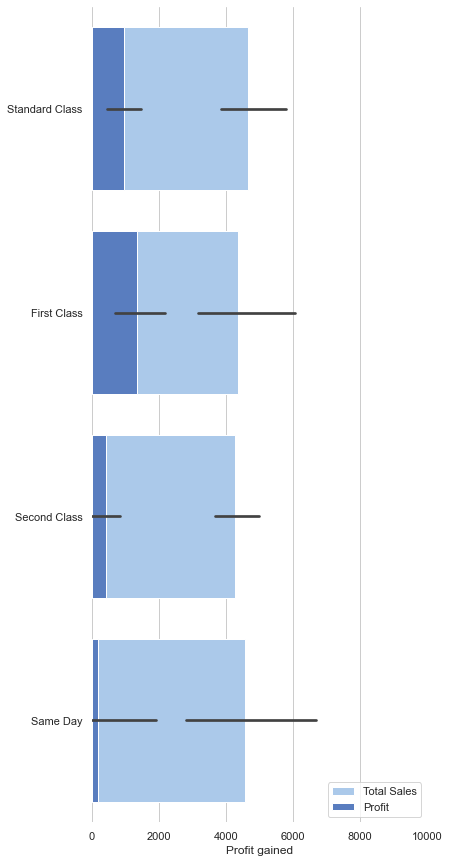

In [61]:
# ship mode vs Profit
sns.set_theme(style='whitegrid')
f,ax = plt.subplots(figsize=(6,15))
sns.set_color_codes("pastel")
sns.barplot(x="Sales",y="Ship Mode",data = df.head(100),label="Total Sales",color='b')

sns.set_color_codes('muted')
sns.barplot(x="Profit",y="Ship Mode",data = df.head(100),label="Profit",color='b')

ax.legend(loc="lower right")
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="Profit gained")
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='Profit', ylabel='Quantity'>

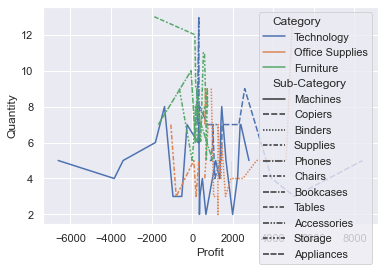

In [101]:
# lineplot
sns.set_theme(style="darkgrid")

sns.lineplot( x="Profit", y="Quantity",
             hue="Category",style="Sub-Category",
             data=df.head(100))

# THANK YOU